In [1]:
!pip install jsonlines

In [2]:
!unzip processed.zip

Archive:  processed.zip
   creating: processed/
  inflating: processed/codeeditsearch.jsonl  
  inflating: processed/instructcoder.jsonl  
 extracting: processed/multipl_e.jsonl  


In [3]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [4]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

processed_path = "/content/processed"
files = ["/content/processed/codeeditsearch.jsonl", "/content/processed/instructcoder.jsonl", "/content/processed/multipl_e.jsonl"]

datasets = {}

for file in files:
    file_path = os.path.join(processed_path, file)
    with open(file_path, "r", encoding="utf-8") as f:
        data_list = [json.loads(line) for line in f]
    df = pd.DataFrame(data_list)
    datasets[file.replace(".jsonl", "")] = df
    print(f"Loaded {file} with shape {df.shape}")

Loaded /content/processed/codeeditsearch.jsonl with shape (21495, 3)
Loaded /content/processed/instructcoder.jsonl with shape (108391, 3)
Loaded /content/processed/multipl_e.jsonl with shape (0, 0)


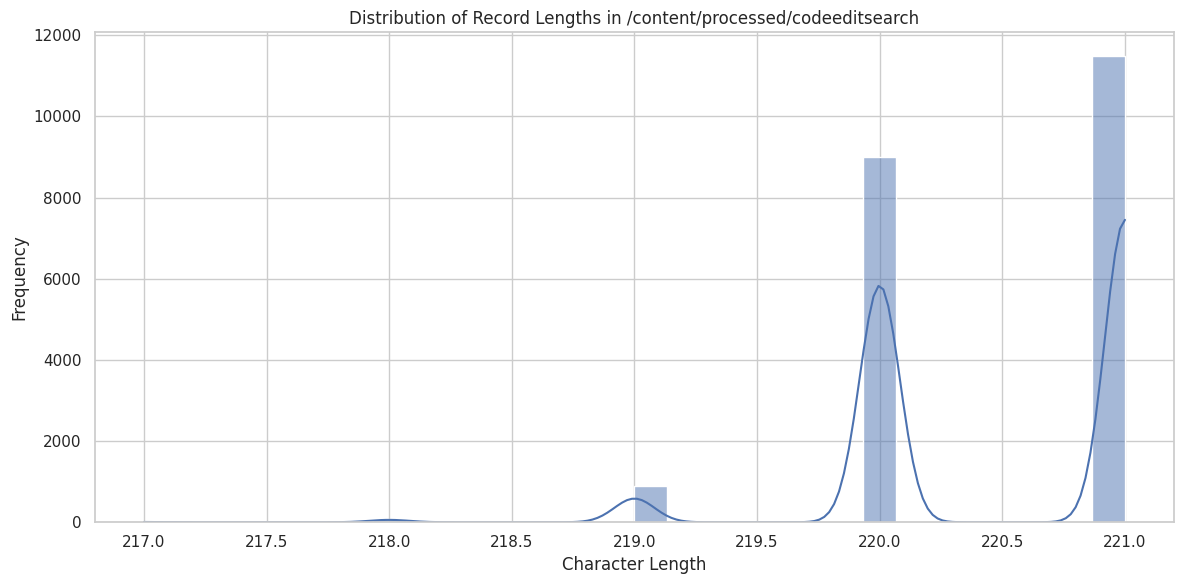

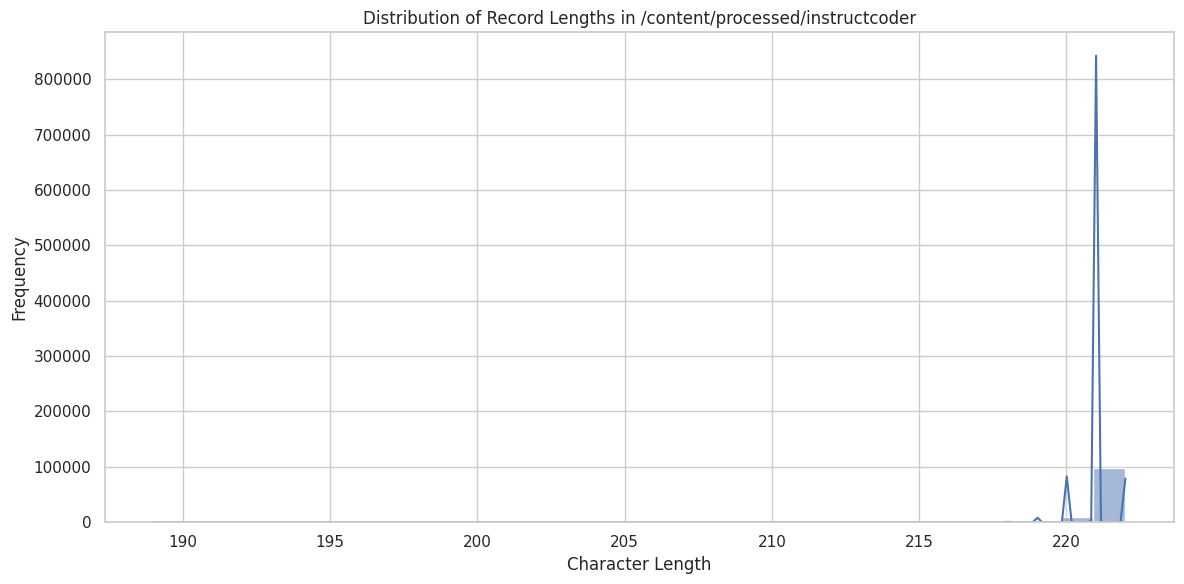

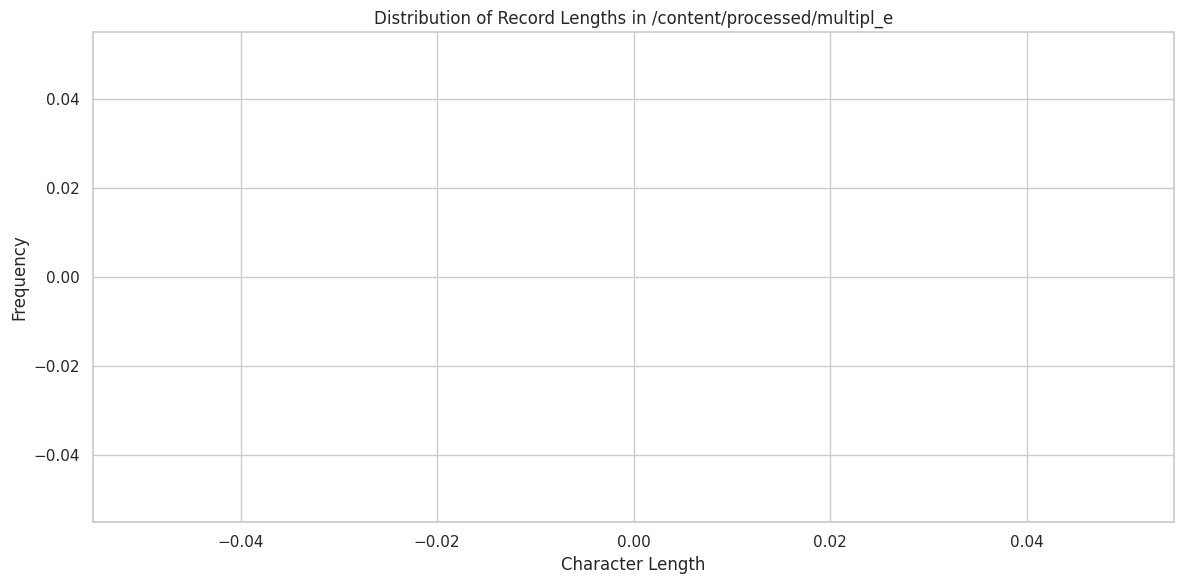

In [5]:
for name, df in datasets.items():
    plt.figure()
    sns.histplot(df.apply(lambda x: len(str(x)), axis=1), bins=30, kde=True)
    plt.title(f"Distribution of Record Lengths in {name}")
    plt.xlabel("Character Length")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    if df.isnull().any().any():
        plt.figure()
        sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
        plt.title(f"Missing Values in {name}")
        plt.show()

Loaded /content/processed/codeeditsearch.jsonl with shape (21495, 3)
Loaded /content/processed/instructcoder.jsonl with shape (108391, 3)
Loaded /content/processed/multipl_e.jsonl with shape (0, 0)

Analyzing Dataset: /CONTENT/PROCESSED/CODEEDITSEARCH


,instruction,input,output
0,Fix the following code bug based on the diff d...,,
1,Fix the following code bug based on the diff d...,,
2,Fix the following code bug based on the diff d...,,
3,Fix the following code bug based on the diff d...,,
4,Fix the following code bug based on the diff d...,,



Missing Values:


,0
instruction,0
input,0
output,0



Data Types:


,0
instruction,object
input,object
output,object


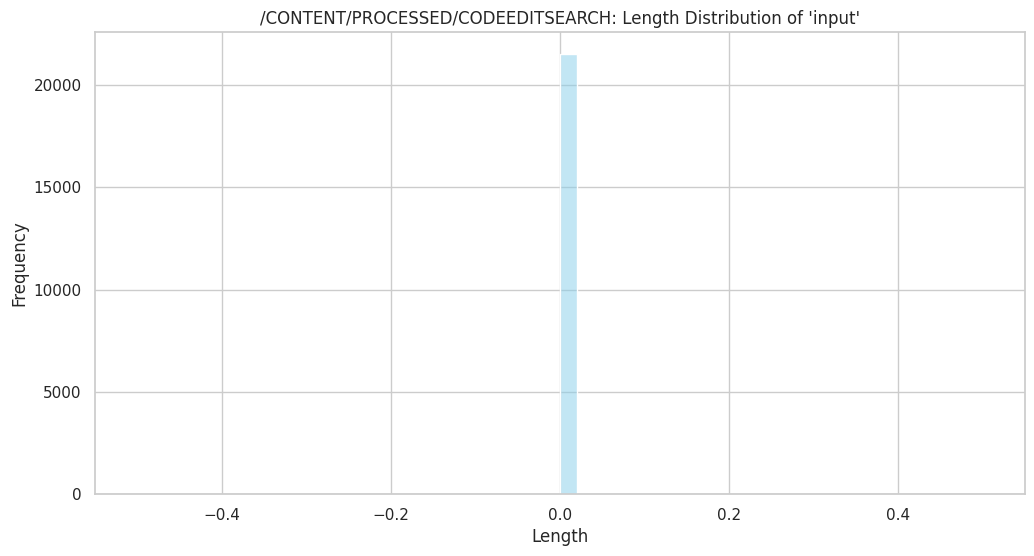

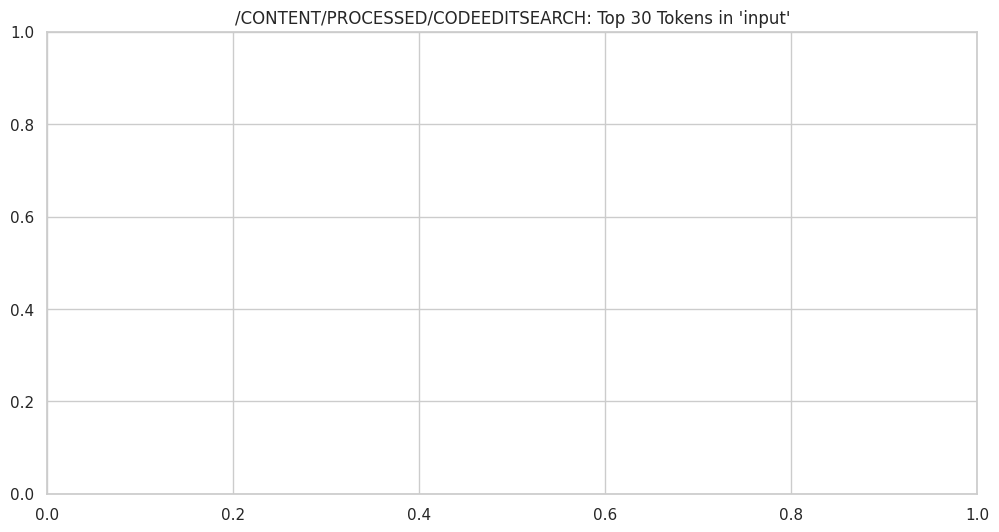

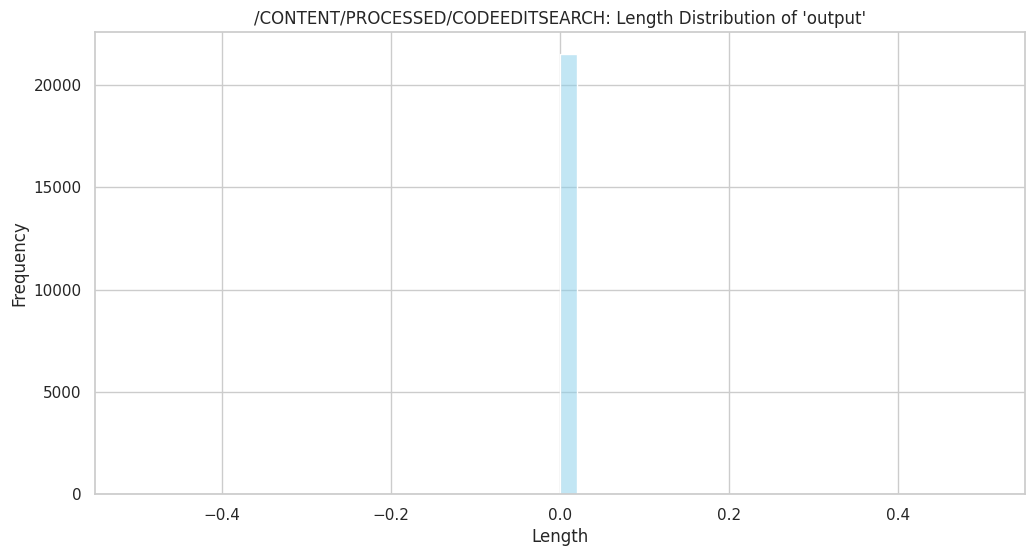

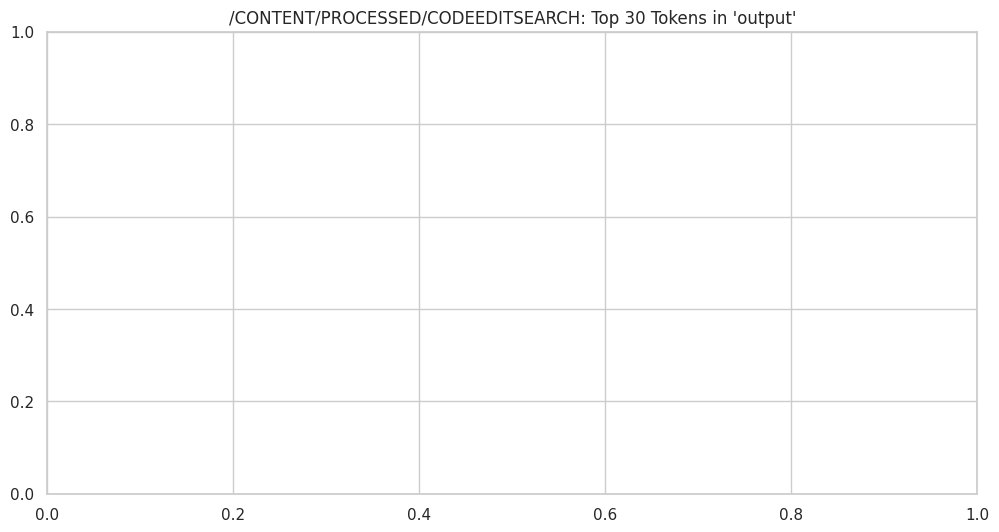


Sample Rows:

Analyzing Dataset: /CONTENT/PROCESSED/INSTRUCTCODER


,instruction,input,output
0,Replace the function call to deduper's '_sampl...,import dedupe\n\ndef detect_fraud(transactions...,import dedupe\n\ndef detect_fraud(transactions...
1,Update the spider class to access settings in ...,import scrapy\n\nclass MySpider(scrapy.Spider)...,import scrapy\n\nclass MySpider(scrapy.Spider)...
2,Change the default color of the plot to improv...,import matplotlib.pyplot as plt\n\ndef plot_fi...,import matplotlib.pyplot as plt\n\ndef plot_fi...
3,Improve 'sort_list' by adding sorting algorith...,"def sort_list(lst, algorithm):\n if algorit...","def sort_list(lst, algorithm=""bubble""):\n ""..."
4,Optimize database queries by reducing the numb...,import sqlite3\n\ndef get_database_connection(...,import sqlite3\n\ndef get_database_connection(...



Missing Values:


,0
instruction,0
input,0
output,0



Data Types:


,0
instruction,object
input,object
output,object


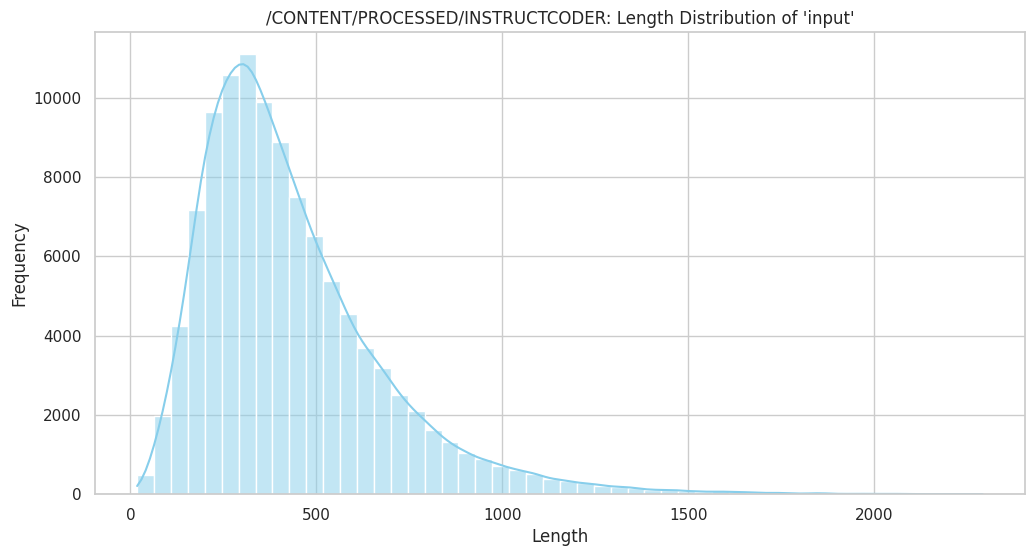

<ipython-input-6-827643aa3a07>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=token_df, x="Frequency", y="Token", palette="viridis")


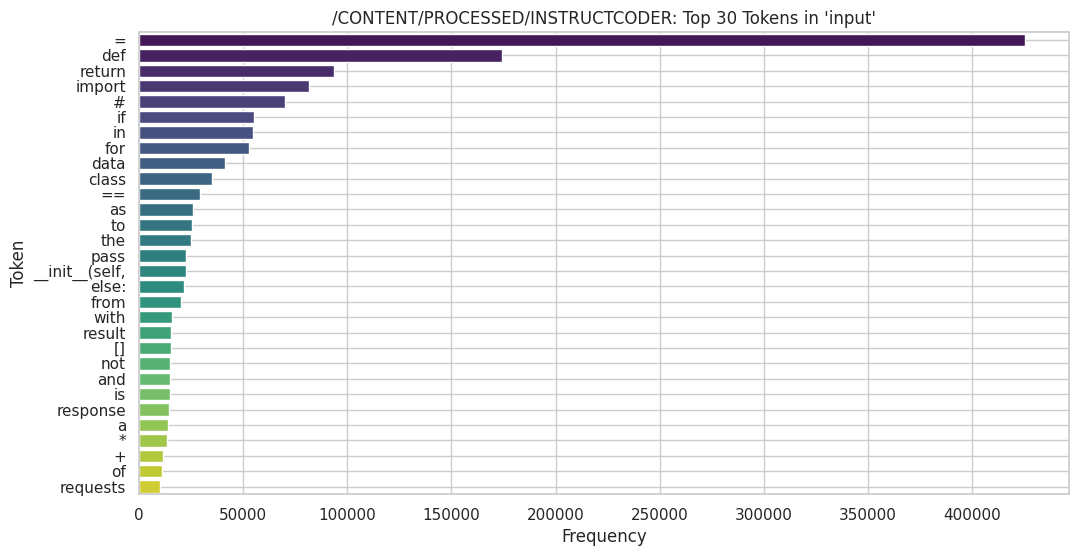

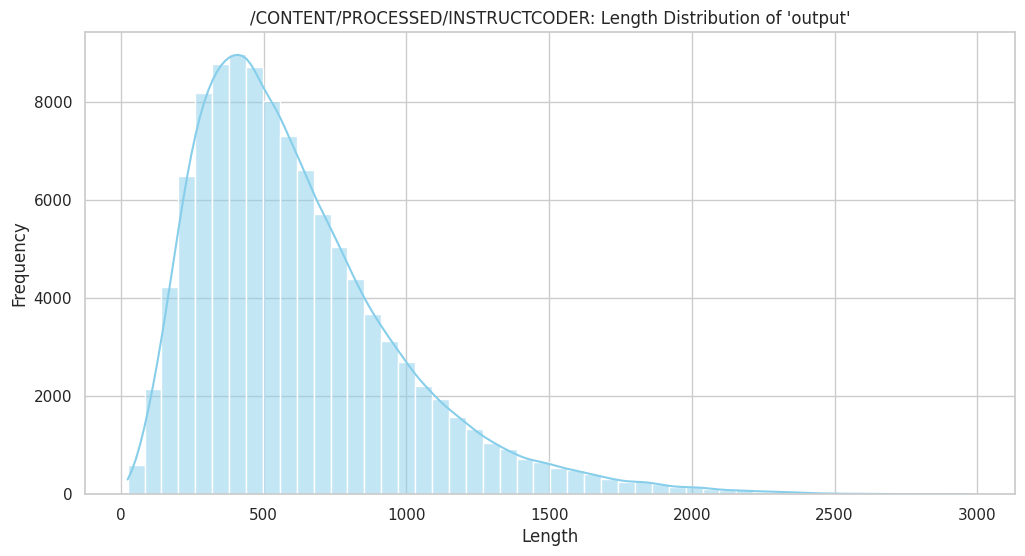

<ipython-input-6-827643aa3a07>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=token_df, x="Frequency", y="Token", palette="viridis")


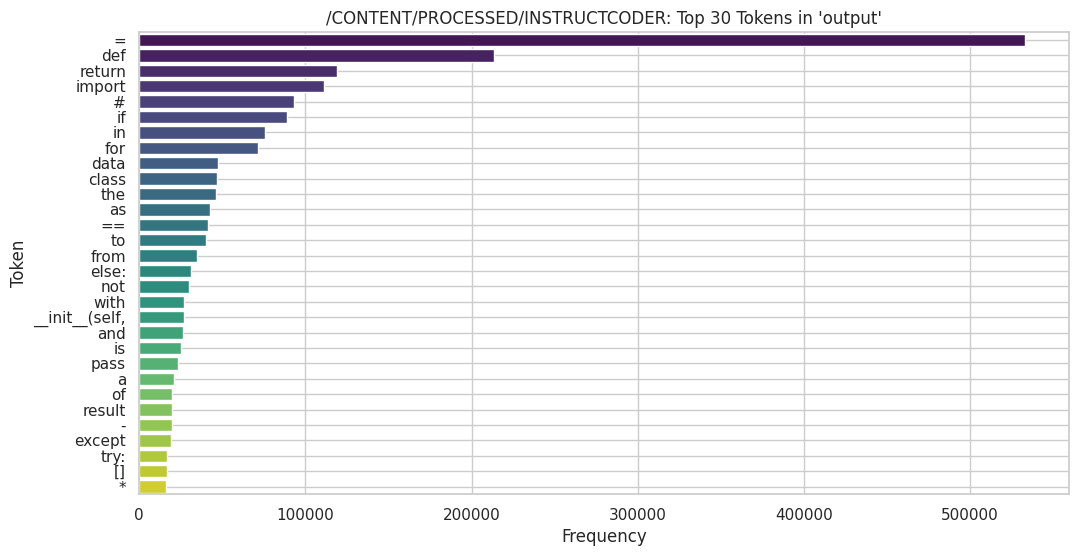


Sample Rows:

Analyzing Dataset: /CONTENT/PROCESSED/MULTIPL_E


""



Missing Values:


,0



Data Types:


,0



Sample Rows:


In [6]:
for file in files:
    file_path = os.path.join(processed_path, file)
    with open(file_path, "r", encoding="utf-8") as f:
        data_list = [json.loads(line) for line in f]
    df = pd.DataFrame(data_list)
    datasets[file.replace(".jsonl", "")] = df
    print(f"Loaded {file} with shape {df.shape}")

for name, df in datasets.items():
    print(f"\nAnalyzing Dataset: {name.upper()}")
    display(df.head())
    print("\nMissing Values:")
    display(df.isnull().sum())
    print("\nData Types:")
    display(df.dtypes)

    for col in ['prompt', 'completion', 'input', 'output']:
        if col in df.columns:
            df[f'{col}_len'] = df[col].astype(str).apply(len)

            plt.figure()
            sns.histplot(df[f'{col}_len'], bins=50, kde=True, color="skyblue")
            plt.title(f"{name.upper()}: Length Distribution of '{col}'")
            plt.xlabel("Length")
            plt.ylabel("Frequency")
            plt.grid(True)
            plt.show()

            all_text = " ".join(df[col].astype(str).tolist())
            tokens = all_text.split()
            token_counts = Counter(tokens)
            most_common = token_counts.most_common(30)
            token_df = pd.DataFrame(most_common, columns=["Token", "Frequency"])

            plt.figure()
            sns.barplot(data=token_df, x="Frequency", y="Token", palette="viridis")
            plt.title(f"{name.upper()}: Top 30 Tokens in '{col}'")
            plt.grid(True)
            plt.show()

    print("\nSample Rows:")